In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
keras = tf.keras

### load the data

In [87]:
df = pd.read_csv('../data/rgs_data.csv')
columns = [
    'temp_mean_all', 'surface_temp_mean_all', 'relhum_mean_all',
    'windspeed_mean', 'precipitation_sum_all', 'pressure_mean_all',
    'global_radiation_short_wave_mean', 'global_radiation_long_wave_mean',
]
train_df = df[columns]
# check if data contains NaNs values
print(train_df.isnull().sum())
train_df

temp_mean_all                       0
surface_temp_mean_all               0
relhum_mean_all                     0
windspeed_mean                      0
precipitation_sum_all               0
pressure_mean_all                   0
global_radiation_short_wave_mean    0
global_radiation_long_wave_mean     0
dtype: int64


,temp_mean_all,surface_temp_mean_all,relhum_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean
0,6.264583,5.325000,88.918750,3.390972,3.1,1012.877778,4.090278,337.013745
1,3.376389,1.965278,70.394444,2.787500,0.1,1018.593056,19.340278,280.099599
2,2.799306,2.163194,88.859028,1.874306,0.1,1022.145833,12.652778,309.902612
3,2.644444,2.236111,96.376389,2.327778,4.4,1020.246528,4.423611,322.004604
4,5.558333,5.254167,97.266667,3.790972,3.3,1014.236111,5.208333,342.212990
...,...,...,...,...,...,...,...,...
1417,7.761111,6.912500,90.742361,1.098611,1.5,986.824306,36.729167,324.606396
1418,0.038889,-0.264583,84.845139,1.766667,0.0,995.873611,21.430556,287.668040
1419,1.259722,1.144444,92.398611,1.044444,4.7,993.229861,21.472222,303.971192
1420,4.140972,3.739583,92.990278,0.981944,0.7,985.796528,19.104167,317.551658


### scale the data

the data contains values from -8 up to 1030

In [88]:
train_df.describe()

,temp_mean_all,surface_temp_mean_all,relhum_mean_all,windspeed_mean,precipitation_sum_all,pressure_mean_all,global_radiation_short_wave_mean,global_radiation_long_wave_mean
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,11.143145,11.311368,76.922063,1.653890,2.157032,1000.735010,122.596885,329.438953
std,6.378455,7.265371,12.480160,0.767026,5.514619,9.533405,93.804754,34.258640
min,-8.857639,-10.308333,28.013194,0.470833,0.000000,963.388194,-5.520833,206.945165
25%,6.245833,5.555556,68.132292,1.109943,0.000000,994.980382,35.522569,307.073496
50%,10.933681,10.872917,78.438889,1.478819,0.100000,1001.496875,107.194444,329.805389
75%,16.171528,17.045833,86.905729,1.962153,2.000000,1006.982465,195.203125,355.740659
max,29.908333,31.823611,98.843056,5.988194,92.900000,1030.550000,346.951389,416.611021


In [89]:
scaler = StandardScaler()
scaler = scaler.fit(train_df)
scaled_train_df = scaler.transform(train_df)

In [90]:
pd.DataFrame(scaled_train_df).describe()

,0,1,2,3,4,5,6,7
count,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03
mean,-1.124276e-17,9.134746e-18,2.872761e-16,-3.391177e-16,4.044272e-17,1.802590e-15,1.652062e-16,3.108937e-16
std,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00
min,-3.136782e+00,-2.976766e+00,-3.920308e+00,-1.542937e+00,-3.912856e-01,-3.918847e+00,-1.366272e+00,-3.576817e+00
25%,-7.680598e-01,-7.925043e-01,-7.045474e-01,-7.094124e-01,-3.912856e-01,-6.038402e-01,-9.285771e-01,-6.530710e-01
50%,-3.285098e-02,-6.036938e-02,1.215817e-01,-2.283257e-01,-3.731456e-01,7.994338e-02,-1.642546e-01,1.069991e-02
75%,7.886159e-01,7.895650e-01,8.002444e-01,4.020354e-01,-2.848567e-02,6.555530e-01,7.742868e-01,7.680094e-01
max,2.942999e+00,2.824282e+00,1.757085e+00,5.652781e+00,1.646077e+01,3.128523e+00,2.392559e+00,2.545423e+00


### generate x and y data

In [91]:
train_x_list = []
train_y_list = []

n_future = 1
n_past = 15

# we can only start at 15 so we have a full window, the last one must be 1
# window before the end
for i in range(n_past, len(scaled_train_df) - n_future + 1):
    # slice and append a moving window of 15
    train_x_list.append(scaled_train_df[i - n_past:i])
    # slice to next day (result we want to predict)
    train_y_list.append(scaled_train_df[i + n_future - 1:i + n_future, 0])

In [92]:
train_x = np.array(train_x_list)
train_y = np.array(train_y_list)
print(train_x.shape)
print(train_y.shape)

(1407, 15, 8)
(1407, 1)


### build a very simple LSTM model

In [93]:
model = keras.models.Sequential()
model.add(
    keras.layers.LSTM(
        1, input_shape=(
            train_x.shape[1], train_x.shape[2],
        ),
    ),
)

opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mse')
model.summary()

history = model.fit(
    train_x, train_y, epochs=80,
    batch_size=8, validation_split=0.1,
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1)                 40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
159/159 [==============================] - 3s 8ms/step - loss: 0.6823 - val_loss: 0.4944
Epoch 2/80
159/159 [==============================] - 1s 5ms/step - loss: 0.5888 - val_loss: 0.4720
Epoch 3/80
159/159 [==============================] - 1s 6ms/step - loss: 0.5274 - val_loss: 0.4628
Epoch 4/80
159/159 [==============================] - 1s 5ms/step - loss: 0.4793 - val_loss: 0.4560
Epoch 5/80
159/159 [==============================] - 1s 5ms/step - loss: 0.4449 - val_loss: 0.4564
Epoch 6/80
159/159 [==============================] - 1s 6ms/step - loss: 0.4177 - val

### make a better model

In [128]:
model = keras.models.Sequential()
model.add(
    keras.layers.LSTM(
        64,
        input_shape=(train_x.shape[1], train_x.shape[2]),
        return_sequences=True,
    ),
)
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(train_y.shape[1]))


opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mse')
model.summary()

history = model.fit(
    train_x, train_y, epochs=20,
    batch_size=16, validation_split=0.1,
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 15, 64)            18688     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,137
Trainable params: 31,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
80/80 [==============================] - 4s 17ms/step - loss: 0.3529 - val_loss: 0.2393
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.2557 - v

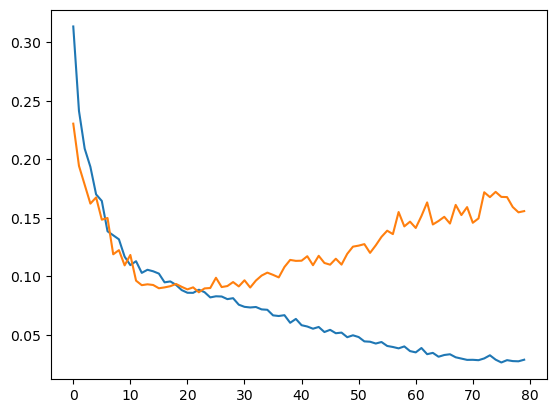

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### deploy the model

In [118]:
forecast = model.predict(train_x)
forecast

44/44 [==============================] - 1s 6ms/step


array([[-0.8912393],
       [-1.0373297],
       [-1.7722051],
       ...,
       [-1.3927262],
       [-1.5365647],
       [-1.2612362]], dtype=float32)

### invert scaling

In [119]:
forecast_copy = np.repeat(forecast, scaled_train_df.shape[1], axis=-1)
y_pred = scaler.inverse_transform(forecast_copy)[:, :1]
y_pred

array([[ 5.460415  ],
       [ 4.5289116 ],
       [-0.15680999],
       ...,
       [ 2.2628276 ],
       [ 1.345683  ],
       [ 3.101236  ]], dtype=float32)

### create a `DataFrame` that will store real and predicted values

In [120]:
real = df[['date', 'temp_mean_all']][n_past:].copy().reset_index(drop=True)
real['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
real

,date,temp_mean_all
0,2019-01-01,5.341667
1,2019-01-02,3.269444
2,2019-01-03,-0.481250
3,2019-01-04,-2.436806
4,2019-01-05,-4.106944
...,...,...
1402,2022-11-03,7.761111
1403,2022-11-04,0.038889
1404,2022-11-05,1.259722
1405,2022-11-06,4.140972


In [121]:
pred = pd.DataFrame(y_pred, columns=['predicted']).reset_index(drop=True)
pred

,predicted
0,5.460415
1,4.528912
2,-0.156810
3,-1.715505
4,-3.569731
...,...
1402,6.864273
1403,7.524320
1404,2.262828
1405,1.345683


In [122]:
new_df = pd.concat([real, pred], axis=1)
new_df = new_df.set_index('date')
new_df

,temp_mean_all,predicted
date,,
2019-01-01,5.341667,5.460415
2019-01-02,3.269444,4.528912
2019-01-03,-0.481250,-0.156810
2019-01-04,-2.436806,-1.715505
2019-01-05,-4.106944,-3.569731
...,...,...
2022-11-03,7.761111,6.864273
2022-11-04,0.038889,7.524320
2022-11-05,1.259722,2.262828


### plot the data

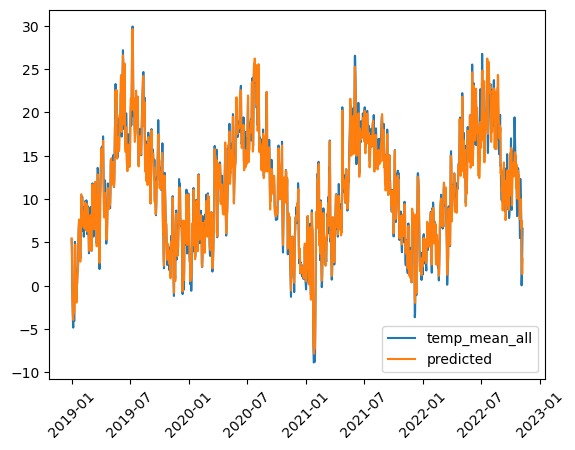

In [123]:
plt.xticks(rotation=45)
plt.plot(new_df)
plt.legend(new_df.columns)

### take a closer look at the validation data

In [124]:
validation_data = int(len(new_df) * 0.1)
val_data = new_df[-validation_data:]
val_data

,temp_mean_all,predicted
date,,
2022-06-21,16.262500,15.708458
2022-06-22,16.484028,14.863157
2022-06-23,17.652778,12.654665
2022-06-24,17.697917,15.995801
2022-06-25,14.958333,12.423649
...,...,...
2022-11-03,7.761111,6.864273
2022-11-04,0.038889,7.524320
2022-11-05,1.259722,2.262828


In [125]:
rmse = np.sqrt(
    mean_squared_error(
        val_data['temp_mean_all'], val_data['predicted'],
    ),
)
print(f'RMSE: {rmse:4f}')

RMSE: 2.458886


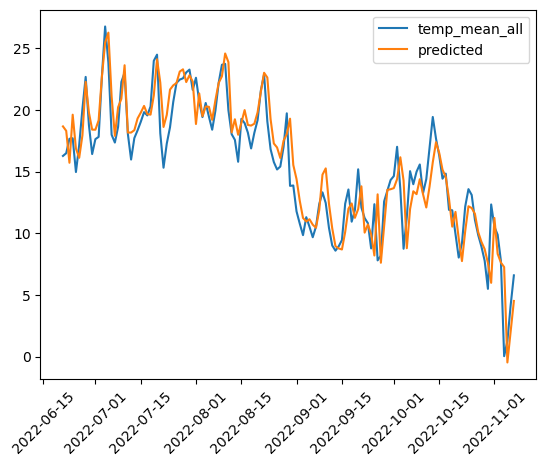

In [115]:
plt.xticks(rotation=45)
plt.plot(val_data)
plt.legend(val_data.columns)